In [5]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from Multi_Task_CNN.mtcnn import detect_face

<p align="center">
  <img src="/imgs/2.PNG" alt="" width="700" height="150" >
 </p>

In [6]:
tf.__version__

'2.1.0'

In [7]:
default_color= (0,255,0)
default_thickness = 3

In [8]:
min_size = 20
thresholds = [.6, .7, .7]
pyramid_factor = .709

In [83]:
def draw_boxes(img, boxes):
    drawn_img = np.copy(img)
    for bounding_box in boxes:
        pts = bounding_box[:4].astype(np.int32)
        pts1 = (pts[0],pts[1])
        pts2 = (pts[2],pts[3])
        cv2.rectangle(drawn_img, pts1, pts2, default_color, default_thickness)
    return drawn_img

In [95]:
def draw_points(img, points):
    drawn_img = np.copy(img)
    for i in range(points.shape[1]):
        pts = points[:,i].astype(np.int32)
        #print(pts)
        for i in range(pts.size //2):
            center = (pts[i],pts[5+i])
            #print(center)
            cv2.circle(drawn_img, center, 2, default_color, default_thickness)
    return drawn_img

# Load Model

In [96]:
with tf.Graph().as_default():
    sess = tf.compat.v1.Session()
    pnet,rnet,onet = detect_face.create_mtcnn(sess, None)
    

# Test Model

In [119]:
img = plt.imread('C:/Users/ziaeeamir/Desktop/Face/Face-Recognition-and-Verification/imgs/6.jpg')


In [120]:
boxes, points = detect_face.detect_face(img, min_size, pnet, rnet, onet, thresholds, pyramid_factor)

In [121]:
B_detected_img = draw_boxes(img, boxes)
P_detected_img = draw_points(B_detected_img, points)


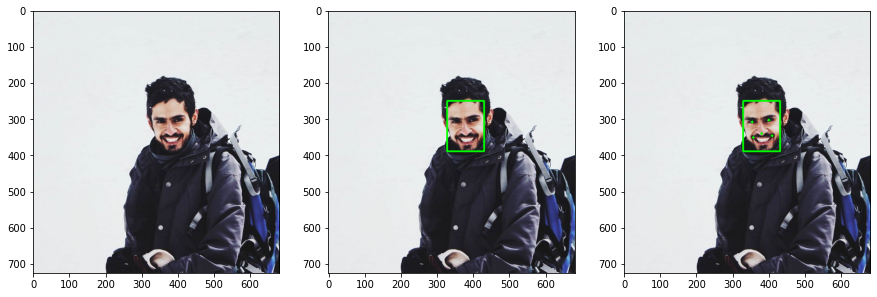

In [122]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figwidth(15)
fig.set_figheight(15)
ax1.imshow(img)
ax2.imshow(B_detected_img)
ax3.imshow(P_detected_img)